In [69]:
pip install --upgrade seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# World Inequality Discussion Graphs -- Instructors ONLY

General Outline: 
1. Unpack this figure
2. Unpack gini coefficient
3. Try to to recreate figure
4. Think about alternate visualizations

## Made-up Gini Coefficient Dataset

In [32]:
gini = pd.read_csv("ginis.csv")
gini = gini.set_index("Year")
gini

,Years of Schooling,Adult Literacy,Primary School Enrollment,Secondary School Enrollment,Tertiary School Enrollment
Year,,,,,
1970,NaN,0.112,NaN,NaN,NaN
1975,0.175,0.106,NaN,NaN,NaN
1980,0.143,0.098,0.082,0.118,0.085
1985,0.138,0.088,NaN,NaN,NaN
1990,0.158,0.080,0.062,0.097,0.035
1995,0.137,0.076,0.049,0.068,0.019
2000,0.125,0.056,0.039,0.041,0.012


Our main goal is to get students thinking about variables and how to visualize them. In addition, looking at the different stories/narratives we can get from choosing to display data. To do this, we are recreating figure 1 from the article and plotting the data using different visualization formats and having the students analyze each visualization.

## Making overlaid line plot (original one from article)

<Axes: xlabel='Year'>

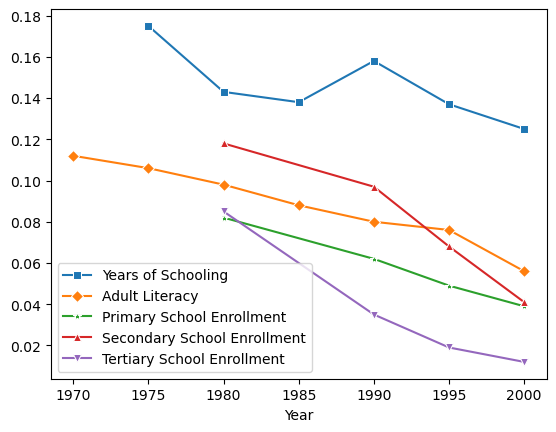

In [33]:
marker = ['s', 'D', '*', '^', 'v']
sns.lineplot(data=gini, dashes=False, markers=marker)

## Making Bar Graph for all 

In [34]:
melted = gini.reset_index().melt(id_vars='Year')

<Axes: xlabel='Year', ylabel='value'>

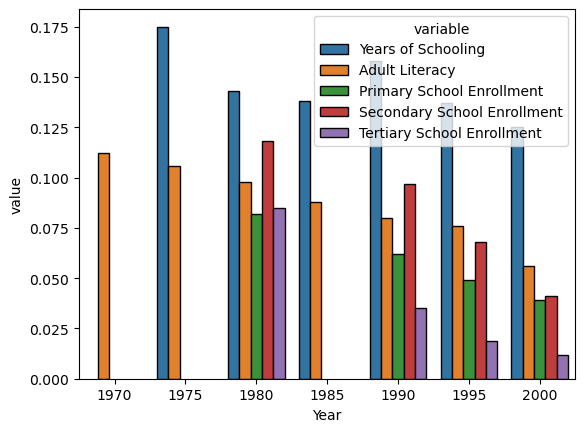

In [35]:
sns.barplot(melted, x="Year", y="value", hue="variable")

# Bar graph for one category

<Axes: xlabel='Year', ylabel='Adult Literacy'>

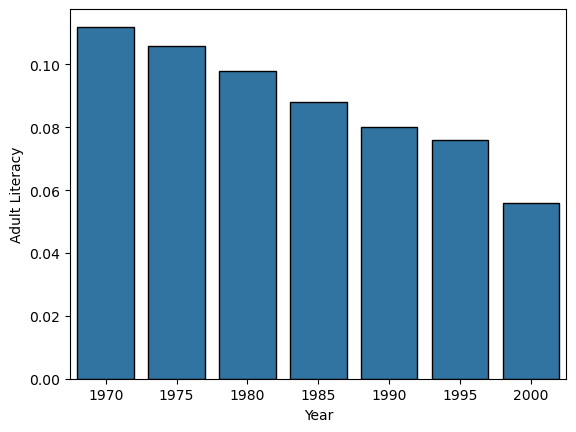

In [36]:
# Replace "Adult Literacy" with any category
sns.barplot(gini["Adult Literacy"])

# Line plot for one category

<Axes: xlabel='Year', ylabel='Adult Literacy'>

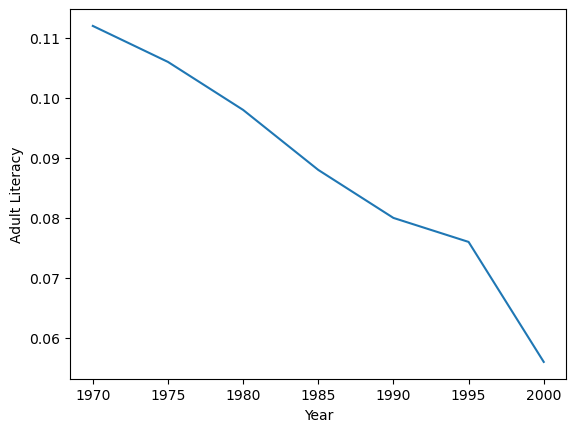

In [37]:
# Replace "Adult Literacy" with any category
sns.lineplot(gini["Adult Literacy"])

# Bar plot for one year

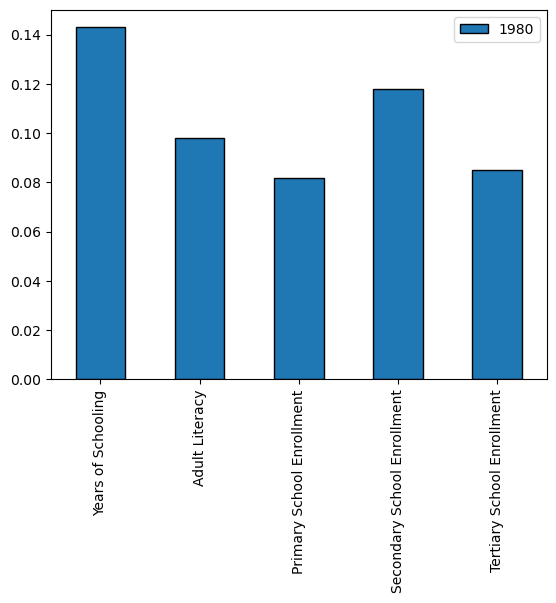

In [38]:
gini.loc[1980].plot.bar().legend()

## Calculating Gini Coefficients
Because of limited data from the article, we only have accurate `share_f`, `share_m`, `pop_f`, and `pop_m` for the year `1970` to be able to accurately compute `gini`. The rest are made up but still produce an accurate gini coefficient that we estimated from the graph provided in the article. 

In [39]:
adult_gini = Table.read_table("adult_literacy.csv")
adult_gini

Year,total_pop,pop_female,pop_male,literate_adults,literate_female,literate_male,share_f,pop_f,share_m,pop_m,gini
1970,2103,1059,1044,1374,615,759,0.448,0.504,0.552,0.496,0.112
1975,nan,nan,nan,nan,nan,nan,0.449,0.502,0.551,0.498,0.106
1980,nan,nan,nan,nan,nan,nan,0.454,0.503,0.546,0.497,0.098
1985,nan,nan,nan,nan,nan,nan,0.46,0.504,0.54,0.496,0.088
1990,nan,nan,nan,nan,nan,nan,0.462,0.502,0.538,0.498,0.08
1995,nan,nan,nan,nan,nan,nan,0.465,0.503,0.535,0.497,0.076
2000,nan,nan,nan,nan,nan,nan,0.477,0.505,0.523,0.495,0.056


The following are the columns we will present to the students. It's important to know that `share_f` + `share_m` = 1 and `pop_f` + `pop_m` = 1. Because of this, `share_f` and `share_m` are complements, same with `pop_m` and `pop_f`. Knowing this, students are then asked to calculate `pop_f` and `share_m` from the complement. Then, using all the values, students must then compute `gini_coefficient` using the formula provided: $\sum_{g} |s_{g} - p_{g}|$. This can be edited to have student calculate any columns.

In [40]:
adult_gini = adult_gini.select("Year", "share_f", "pop_m")
adult_gini

Year,share_f,pop_m
1970,0.448,0.496
1975,0.449,0.498
1980,0.454,0.497
1985,0.46,0.496
1990,0.462,0.498
1995,0.465,0.497
2000,0.477,0.495


In [41]:
pop_f = 1 - adult_gini.column("pop_m")
share_m = 1 - adult_gini.column("share_f")
adult_gini = adult_gini.with_columns("pop_f", pop_f, "share_m", share_m)
adult_gini

Year,share_f,pop_m,pop_f,share_m
1970,0.448,0.496,0.504,0.552
1975,0.449,0.498,0.502,0.551
1980,0.454,0.497,0.503,0.546
1985,0.46,0.496,0.504,0.54
1990,0.462,0.498,0.502,0.538
1995,0.465,0.497,0.503,0.535
2000,0.477,0.495,0.505,0.523


In [42]:
adult_coeff = abs(adult_gini.column("share_f") - adult_gini.column("pop_f")) + abs(adult_gini.column("share_m") - adult_gini.column("pop_m"))

In [43]:
adult_gini = adult_gini.with_columns("gini_coefficient", adult_coeff)
adult_gini

Year,share_f,pop_m,pop_f,share_m,gini_coefficient
1970,0.448,0.496,0.504,0.552,0.112
1975,0.449,0.498,0.502,0.551,0.106
1980,0.454,0.497,0.503,0.546,0.098
1985,0.46,0.496,0.504,0.54,0.088
1990,0.462,0.498,0.502,0.538,0.08
1995,0.465,0.497,0.503,0.535,0.076
2000,0.477,0.495,0.505,0.523,0.056


## Same graphs as the first section but using `datascience` library

Using the same dataset from the first section, we can produce the following 4 visualizations using the `datascience` library. These can then be used to make computing questions/excersies to have the students plot the visualizations themselves.

In [44]:
# this version DOES NOT work for line plot, but works for the following 4 visualizations
student_gini = Table.read_table("ginis.csv")
student_gini

Year,Years of Schooling,Adult Literacy,Primary School Enrollment,Secondary School Enrollment,Tertiary School Enrollment
1970,nan,0.112,nan,nan,nan
1975,0.175,0.106,nan,nan,nan
1980,0.143,0.098,0.082,0.118,0.085
1985,0.138,0.088,nan,nan,nan
1990,0.158,0.08,0.062,0.097,0.035
1995,0.137,0.076,0.049,0.068,0.019
2000,0.125,0.056,0.039,0.041,0.012


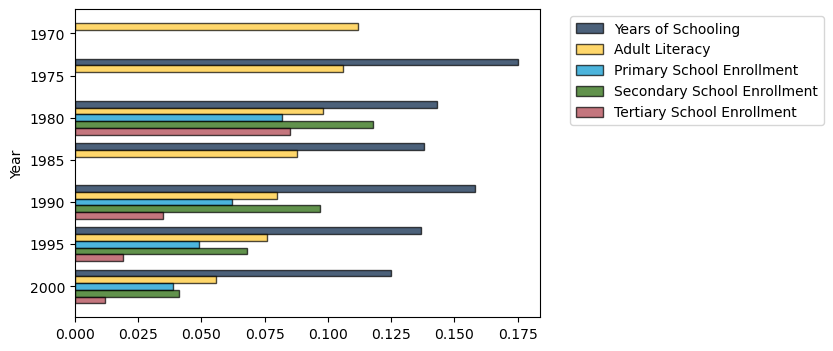

In [45]:
student_gini.barh("Year", overlay=True)

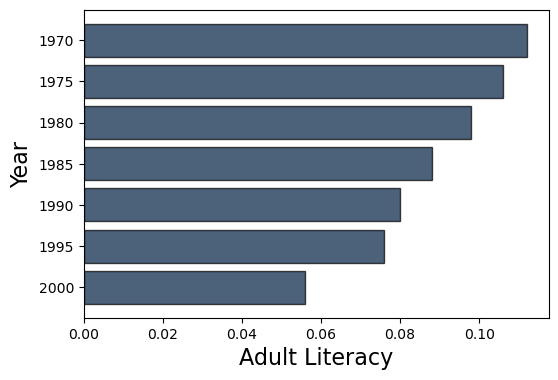

In [46]:
student_gini.barh("Year", "Adult Literacy")

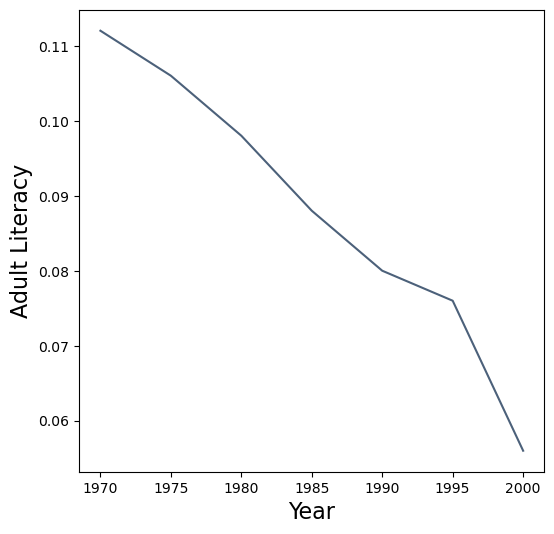

In [47]:
student_gini.plot("Year", ["Adult Literacy"])

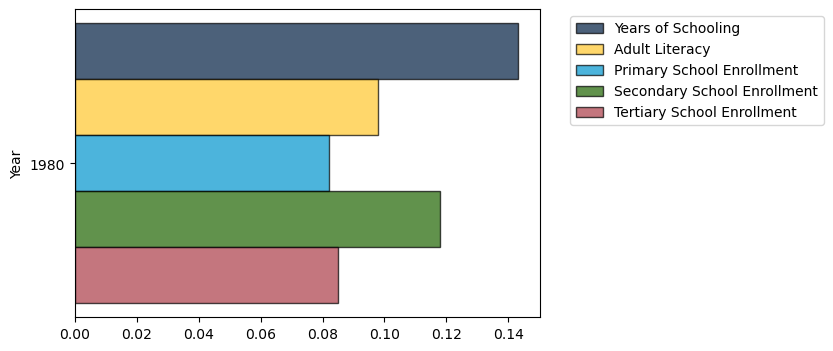

In [48]:
student_gini.where("Year", 1980).barh("Year")

Due to the limitations of the `datascience` library, making an overlaid line plot with the original `ginis.csv` with the `datascience` library doesn't work because of the `NaN` values like how `matplotlib` works. For example:

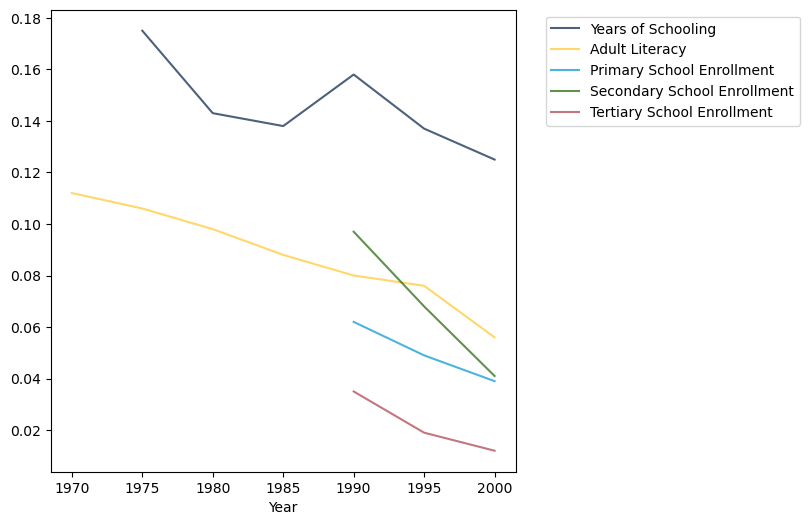

In [49]:
student_gini.plot("Year", ["Years of Schooling","Adult Literacy", "Primary School Enrollment", "Secondary School Enrollment", "Tertiary School Enrollment"])

In order to make the line plot work, we need to fill in the `NaN` values for year 1985 for primary, secondary, and tertiary school enrollment. Loading the csv below does this to be able to make then right line plot. Also due to limitations of the library, we can not edit marker styles.

In [50]:
# load this version for the line plot ONLY
student_gini = Table.read_table("student_ginis.csv")
student_gini

Year,Years of Schooling,Adult Literacy,Primary School Enrollment,Secondary School Enrollment,Tertiary School Enrollment
1970,nan,0.112,nan,nan,nan
1975,0.175,0.106,nan,nan,nan
1980,0.143,0.098,0.082,0.118,0.085
1985,0.138,0.088,0.072,0.108,0.06
1990,0.158,0.08,0.062,0.097,0.035
1995,0.137,0.076,0.049,0.068,0.019
2000,0.125,0.056,0.039,0.041,0.012


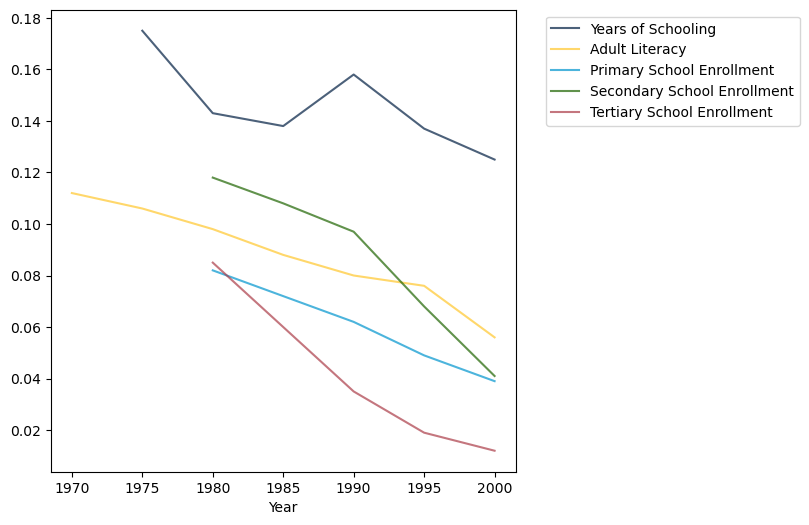

In [51]:
student_gini.plot("Year", ["Years of Schooling","Adult Literacy", "Primary School Enrollment", "Secondary School Enrollment", "Tertiary School Enrollment"])